In [59]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.gridspec import GridSpec
%matplotlib inline

In [ ]:
%%html
<script>
    // AUTORUN ALL CELLS ON NOTEBOOK-LOAD!
    require(
         ["notebook/js/outputarea"],
        function (oa) {
            oa.OutputArea.auto_scroll_threshold = -1;
            console.log("Setting auto_scroll_threshold to -1");
        }
    );
</script>

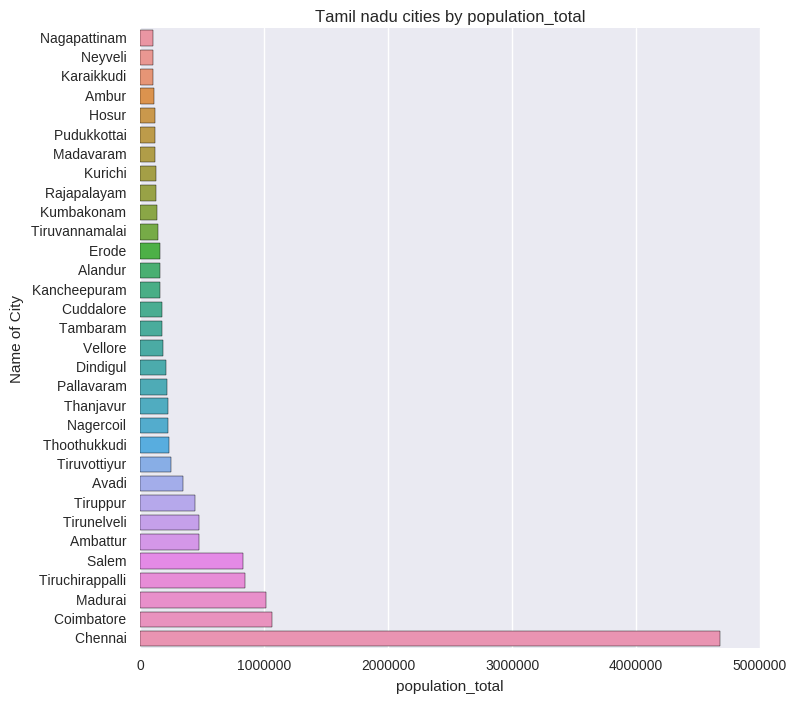

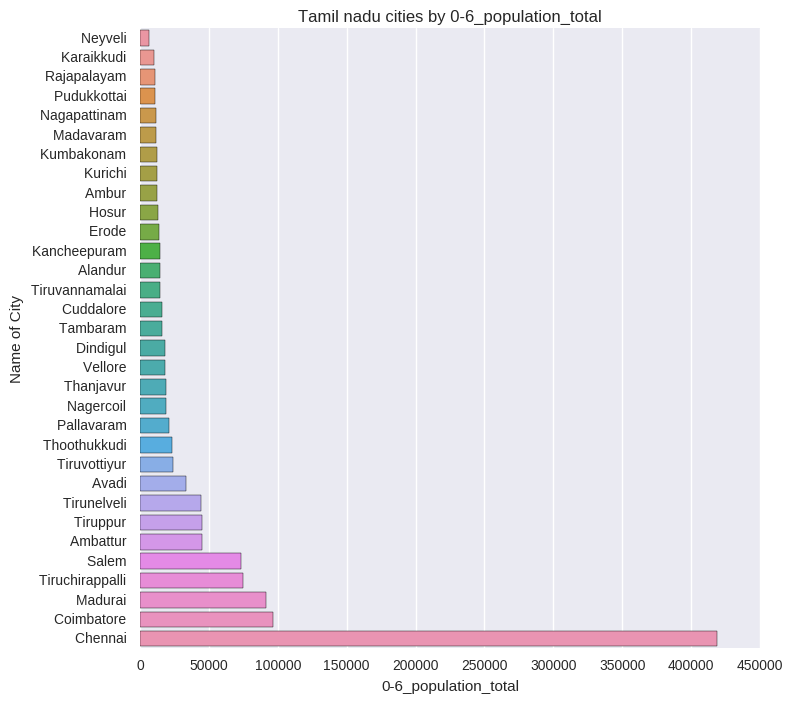

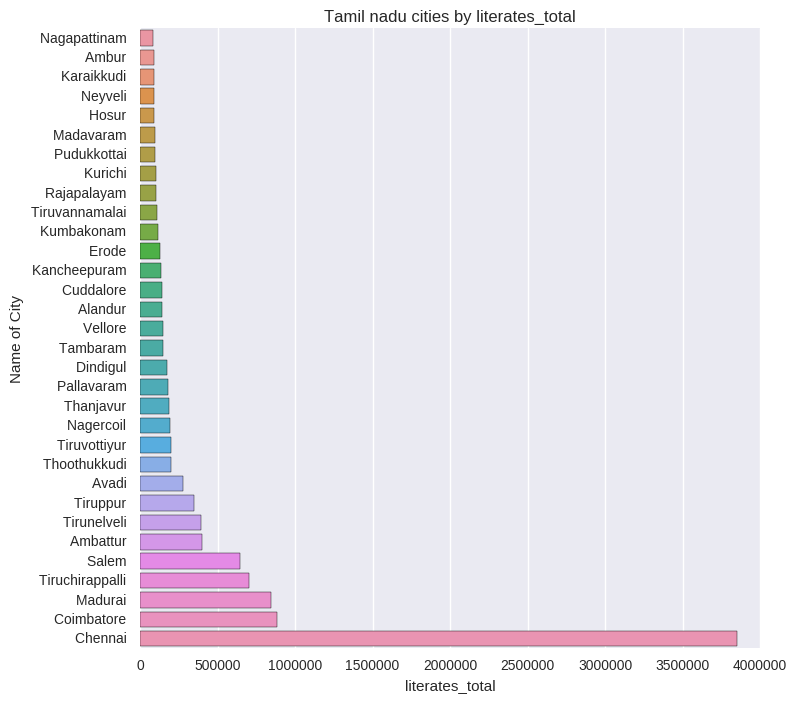

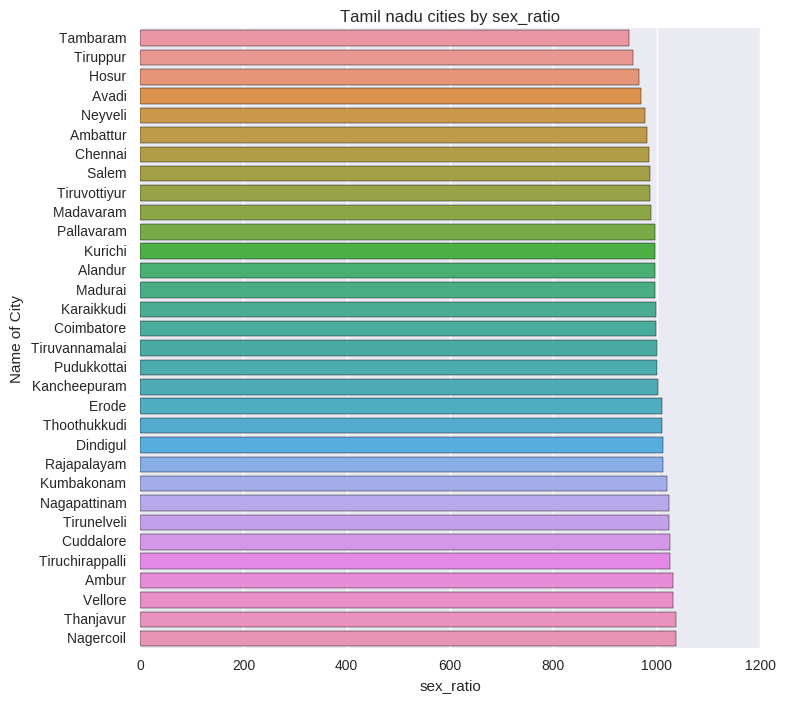

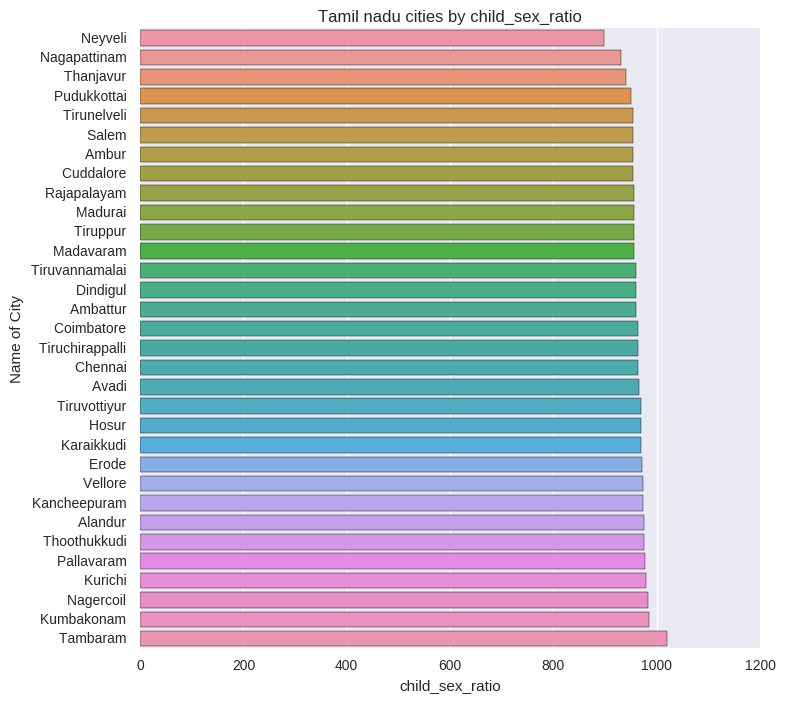

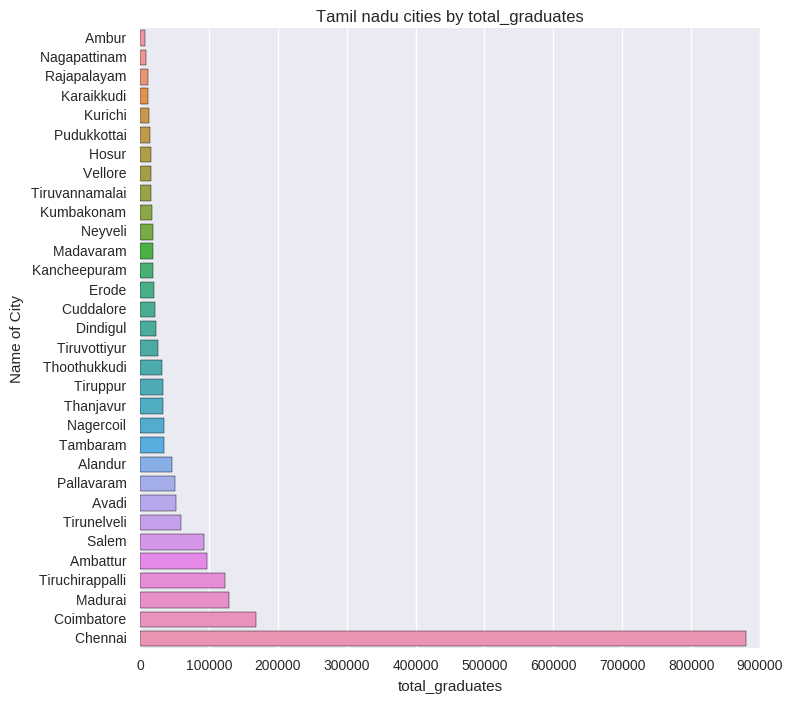

In [60]:
indian_cities = pd.read_csv('data/top-500-indian-cities.csv')

tamilnadu_cities = indian_cities[indian_cities.state_name == 'TAMIL NADU']
for col_name in ['population_total', '0-6_population_total', 'literates_total', 'sex_ratio', 'child_sex_ratio', 'total_graduates']:
    tamilnadu_cities_by_col = tamilnadu_cities.sort_values(by=col_name)
    plt.figure(figsize=(8, 8))
    ax = sns.barplot(x=col_name, y='name_of_city', data=tamilnadu_cities_by_col)
    ax.set(xlabel=col_name, ylabel='Name of City' )
    plt.title('Tamil nadu cities by ' + col_name)


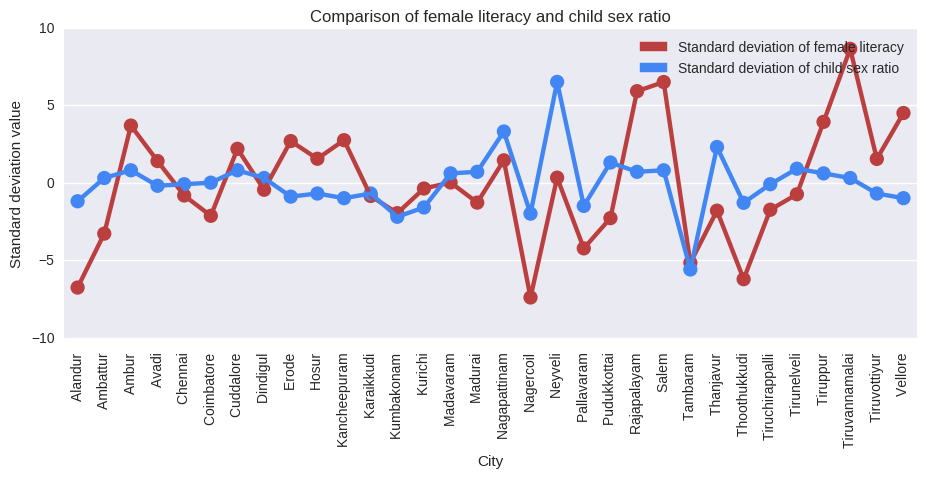

In [66]:
# Lets compare SD of female literacey against child sex ratio, will it produce interesting results !!?
tc_by_female_literacy_ratio = tamilnadu_cities.copy()
tc_by_female_literacy_ratio['female_literacy_sd'] = tc_by_female_literacy_ratio.apply(lambda x:  tc_by_female_literacy_ratio['effective_literacy_rate_female'].mean() - x['effective_literacy_rate_female'], axis=1)
tc_by_female_literacy_ratio['child_sex_ratio_sd'] = tc_by_female_literacy_ratio.apply(lambda x:  (tc_by_female_literacy_ratio['child_sex_ratio'].mean() - x['child_sex_ratio']) * 0.10 , axis=1)

plt.figure(figsize=(11, 4))
ax = sns.pointplot(x='name_of_city', y='female_literacy_sd', data=tc_by_female_literacy_ratio, color="#bb3f3f", label="mean_female_literacy_diff")
sns.pointplot(x="name_of_city", y="child_sex_ratio_sd", data=tc_by_female_literacy_ratio, color="#4286f4", label="before_2016")
ax.set_xticklabels(rotation=90, labels=tamilnadu_cities_ltr_ratio.name_of_city)
ax.set(ylabel='Standard deviation value', xlabel='City')

import matplotlib.patches as mpatches
red_patch = mpatches.Patch(color="#bb3f3f", label='Standard deviation of female literacy')
blu_patch = mpatches.Patch(color="#4286f4", label='Standard deviation of child sex ratio')#
plt.legend(handles=[red_patch,blu_patch])
plt.title("Comparison of female literacy and child sex ratio")


## Its obvious!!

#### Graph shows female literacy is vital for better child sex ratio
#### Educate women for better India!!